---

# Data Science & Machine Learning Lecture 3. Introducing the Single Neuron Model

## The Perceptron 

In this notebook we introduce a specific type of single neuron model called the *perceptron*. For supplemental videos on this topic see:
1. [Single Neuron Model and Perceptron Theory Video](https://www.youtube.com/watch?v=SmEKxsd_67w&t=1935s)
2. [Implementing the Perceptron Code Video](https://www.youtube.com/watch?v=NpTfxpHlHJ4&t=1581s)

The perceptron is a single neuron model with the *sign* activation function as depicted in the figure below.

<p align="center">
    <img src="ThePerceptronImage.png" width="500">
</p>


We will implement and train this model on the iris dataset (which I have stored in a Datasets folder). If you have cloned my Github repository for this course go ahead and get started by running the following code in the cell below.

```python
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Import a nice function for plotting decision boudaries
from mlxtend.plotting import plot_decision_regions

# Set the Seaborn theme
sns.set_theme()

# Read the iris dataset into a pandas DataFrame object
df = pd.read_csv("Datasets/iris_dataset.csv")
```

---

In [12]:
#%pip install mlxtend

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Import a nice function for plotting decision boudaries
from mlxtend.plotting import plot_decision_regions

# Set the Seaborn theme
sns.set_theme()

# Read the iris dataset into a pandas DataFrame object
df = pd.read_csv("Datasets/iris_dataset.csv")

# Alternatively you may run:
# df = pd.read_csv("https://raw.githubusercontent.com/RandyRDavila/Data_Science_and_Machine_Learning_Spring_2022/main/Lecture_3/Datasets/iris_dataset.csv")

---

The Perceptron is used on binary classification problems. Thus, we need to choose two of the three species of iris flower to implement and train the perceptron on. For our purposes we will focus on "setosa" and "versicolor" iris species. The data for these two species are contained in the first 100 rows of data in ```df```. Try running the following code in the cell below. 

```python
df.iloc[:100]
```

---

In [20]:
def preactivation(x,w,b):
    return np.dot(x,w) + b

def sign(z):
    if z>=0:
        return 1
    else:
        return -1

def postactivation(x,w,b):
    return sign(preactivation(x,w, b))

In [ ]:
w0 = np.random.randn(2)


In [ ]:
def loss(x, y, w, b):
     y_hat = postactivation(x, w, b)

In [13]:
df.iloc[:100]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,versicolor
96,5.7,2.9,4.2,1.3,versicolor
97,6.2,2.9,4.3,1.3,versicolor
98,5.1,2.5,3.0,1.1,versicolor


---

The perceptron can take in any number of feature measurments, but for simplicity we focus our attention on just two feature measurements, namely "sepal length" and "sepal width". Moreover, we need to also convert the string names associated with each species to numerical values; for example, map "setosa" species to -1 and "versicolor" species to 1. The following code preproccesses our data into these desired formats. 

```python
# Store the desired species values in the numpy array y
y = df.iloc[0:100].species.values

# Convert each entry of y with setosa to -1 and otherwise 1
y = np.where(y == 'setosa', -1, 1)

# Store the desired feature measurements in the matrix X
X = df[["sepal_length", "sepal_width"]].iloc[:100].values
```

---

In [14]:
# Store the desired species values in the numpy array y
y = df.iloc[0:100].species.values

# Convert each entry of y with setosa to -1 and otherwise 1
y = np.where(y == 'setosa', -1, 1)

# Store the desired feature measurements in the matrix X
X = df[["sepal_length", "sepal_width"]].iloc[:100].values

---

As mentioned in a previous lecture [python classes lecture](https://www.youtube.com/watch?v=qkbyE1vUl58&list=PLiUo37D6MN3Fc-lICEHyR46VfwynkIRrf&index=7), python classes store data as class attribute and functions as class methods. This framework is perfect for implementing a single neuron model. Thus, we next write a custom python class that stores a scaling value for the cost function, the number of epochs when training, the weights (and bias), and the errors incured during training on a given instance. Moreover, this python class will also contain a training method, a input method, and a predict method. Please run the following code in the cell below. 

```python
class Perceptron(object):
    def __init__(self, eta = .5, epochs=50):
        self.eta = eta
        self.epochs = epochs
        
    def train(self, X, y):
        self.w_ = np.random.rand(1 + X.shape[1])
        
        self.errors_ = []
        
        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (self.predict(xi) - target)
                self.w_[:-1] -= update*xi
                self.w_[-1] -= update
                errors += int(update != 0)
            if errors == 0:
                return self
            else:
                self.errors_.append(errors)
            
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[:-1]) + self.w_[-1]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)
```

---

In [15]:
class Perceptron(object):
    def __init__(self, eta = .5, epochs=50):
        self.eta = eta
        self.epochs = epochs
        
    def train(self, X, y):
        self.w_ = np.random.rand(1 + X.shape[1])
        
        self.errors_ = []
        
        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (self.predict(xi) - target)
                self.w_[:-1] -= update*xi
                self.w_[-1] -= update
                errors += int(update != 0)
            if errors == 0:
                return self
            else:
                self.errors_.append(errors)
            
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[:-1]) + self.w_[-1]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)
        

---

Next we can instantiate an instance of the ```Perceptron``` class and also train this instance over 1000 epochs by running the following code in the cell below. 
```python
# Instantiate one instance of the Perceptron class
percep = Perceptron(epochs = 1000)

# Call the train method to train the weights and bias of the given instance
percep.train(X, y)
```

---

In [16]:
# Instantiate one instance of the Perceptron class
clf = Perceptron(epochs = 100_000)

# Call the train method to train the weights and bias of the given instance
clf.train(X, y)

---

After training has finished we can call the ```Perceptron``` class ```predict``` method to view its current predictions given input features. We can quickly view these predictions on the entries in ```X``` by running the following code in the cell below.
```python
# Predict labels on the features in X
y_hat = percep.predict(X)

# Compare y_hat and y
print(y == y_hat)

```



---

In [17]:
# Predict labels on the features in X
y_hat = clf.predict(X)

# Compare y_hat and y
print(y == y_hat)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]


---

As we can see from the output of the code above, the predicted values have matched the true values on the given data. We can visualize this in the Euclidian plane by calling the ```plot_decision_regions``` function imported at the top of this notebook. This function will scatter the iris data in the plane and also show the regions of space where a given point will be classified either -1 or 1. It super easy to use and I'm glad I found it! Try running the following code in the cell below.
```python
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = percep)
plt.title("My First Perceptron", fontsize = 18)
plt.xlabel("sepal length [cm]", fontsize = 15)
plt.ylabel("petal length [cm]", fontsize = 15)
plt.show()
```

---

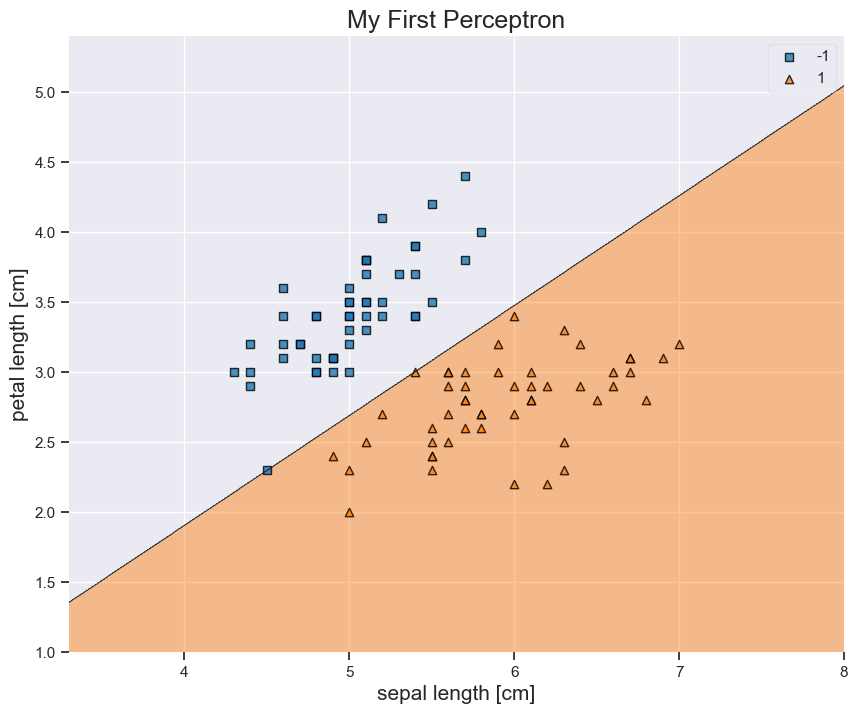

In [18]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = clf)
plt.title("My First Perceptron", fontsize = 18)
plt.xlabel("sepal length [cm]", fontsize = 15)
plt.ylabel("petal length [cm]", fontsize = 15)
plt.show()

---

As you can see from the output of the code above, we have found a nice linear seperator which has classified our data. But how long did our perceptron model train for? Luckily, when we defined our ```Perceptron``` class we stored the error incured by the model at each iteration of an epoch in the ```errors_``` attribute. We can view these errors over each epoch by running the following code in the cell below. 
```python
plt.figure(figsize = (10, 8))
plt.plot(range(1, len(percep.errors_)+1), percep.errors_, 
         marker = "o",
         label = "error plot",)
plt.xlabel("Iterations")
plt.ylabel("Missclassifications")
plt.legend()
plt.show()
```

---

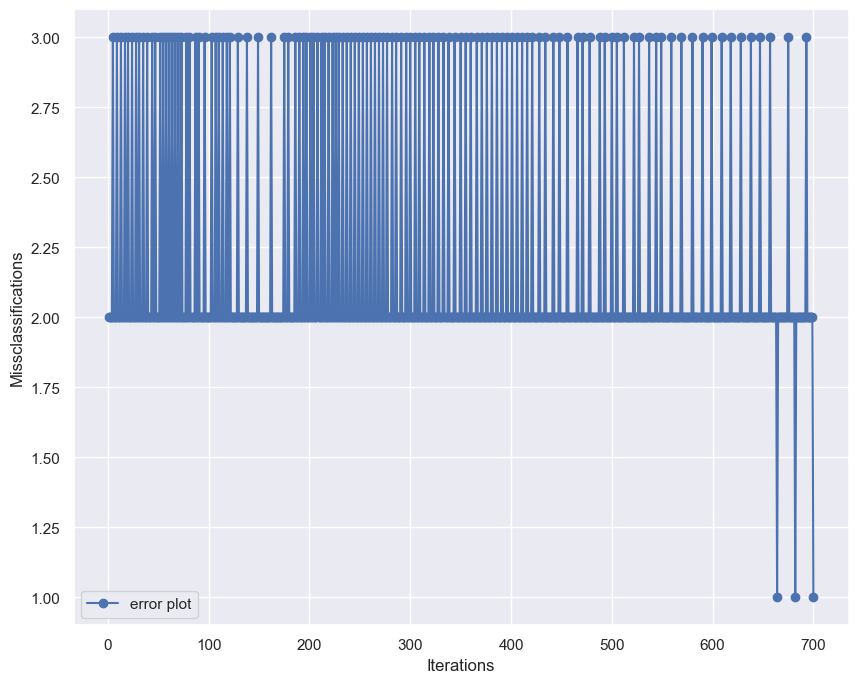

In [19]:
plt.figure(figsize = (10, 8))
plt.plot(range(1, len(clf.errors_)+1), clf.errors_, 
         marker = "o",
         label = "error plot",)
plt.xlabel("Iterations")
plt.ylabel("Missclassifications")
plt.legend()
plt.show()

---

# Conclusion 

We have shown that the perceptron model works well on classifying these two species of iris flower. However, the data generated by these measurements and species was *linearly seperable*. What happens if the data is not linearly seperable? I encourage you to repeat each step of this notebook with the "versicolor" and "virginica" flowers and experiment with different possible measurements. Also, I have included the palmer penguins dataset in the Datasets folder. You should also try and implement the perceptron model on that data as well. 


---